In [1]:
%pip install pandas 
%pip install numpy 
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/home/josh/Dev/tyit_sem5/dmdw/dwdm_project/data/stocks/NVDA.csv')
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,1.750000,1.953125,1.552083,1.640625,1.509998,67867200.0
1,1999-01-25,1.770833,1.833333,1.640625,1.812500,1.668188,12762000.0
2,1999-01-26,1.833333,1.869792,1.645833,1.671875,1.538759,8580000.0
3,1999-01-27,1.677083,1.718750,1.583333,1.666667,1.533965,6109200.0
4,1999-01-28,1.666667,1.677083,1.651042,1.661458,1.529172,5688000.0
...,...,...,...,...,...,...,...
5329,2020-03-26,253.940002,262.220001,250.000000,257.239990,257.239990,17402700.0
5330,2020-03-27,250.000000,263.119995,248.679993,252.729996,252.729996,15970700.0
5331,2020-03-30,255.360001,265.959991,253.589996,265.589996,265.589996,15056300.0
5332,2020-03-31,267.200012,275.399994,257.750000,263.600006,263.600006,23749000.0


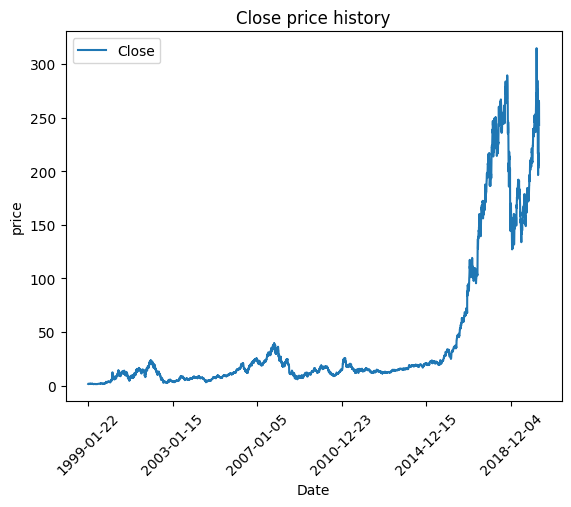

In [4]:
df.plot(x = "Date", y= "Close")
plt.xticks(rotation = 45)
plt.title("Close price history")
plt.ylabel("price")
plt.show()

In [5]:
model = RandomForestRegressor()

In [6]:
#train the model 
x = df[["Open", "High", "Low", "Volume"]]
x = x[:int(len(df)-3)]
y = df['Close'].shift(-1)
y = y[:int(len(df)-3)]
model.fit(x,y)

RandomForestRegressor()

In [9]:
# test the model 
print("Model score is: ", model.score(x,y))

predictions = model.predict(x)
print('the model score is: ', model.score(x,y))

Model score is:  0.9997807087950469
the model score is:  0.9997807087950469


In [12]:
#predictions: 
new_data = df[["Open", "High", "Low", "Volume"]].tail(3)[0:2]
prediction = model.predict(new_data)
print("the model predicts the last row or day to be:", prediction)
print("actual value: " ,df[['Close']].tail(3).values[0][0])


the model predicts the last row or day to be: [265.78060471 267.05260101]
actual value:  265.5899963378906
